In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt

#label encoding
from sklearn.preprocessing import LabelEncoder

#text cleaning library
import re 
import nltk      #natural languaage tool kit
nltk.download("stopwords")
from nltk.corpus import stopwords


#train test split
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer 

import scipy as sc 

import tensorflow as t
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Abhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df  =pd.read_csv("Tweets.csv")

In [3]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,24/02/2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,24/02/2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,24/02/2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,24/02/2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,24/02/2015 11:14,NaN,Pacific Time (US & Canada)


In [4]:
df.isna().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [5]:
df.airline.value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

In [6]:
df.airline.unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

In [7]:
#df.drop(["tweet_id","airline_sentiment_gold","name","negativereason_gold","retweet_count","tweet_coord","tweet_created","tweet_location","user_timezone"],axis=1,inplace=True)

In [8]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,24/02/2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,24/02/2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,24/02/2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,24/02/2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,24/02/2015 11:14,NaN,Pacific Time (US & Canada)


In [9]:
#df.negativereason_confidence.fillna(value=0.5,axis=0,inplace=True)

In [10]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,24/02/2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,24/02/2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,24/02/2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,24/02/2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,24/02/2015 11:14,NaN,Pacific Time (US & Canada)


In [11]:
#le = LabelEncoder()
#for col in df.columns:
#    if df[col].dtype == object:
#        df[col]=le.fit_transform(df[col])


In [12]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,24/02/2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,24/02/2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,24/02/2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,24/02/2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,24/02/2015 11:14,NaN,Pacific Time (US & Canada)


In [13]:
#

## sentiment Analysis

In [14]:
df = df[["airline_sentiment","text"]]

In [15]:
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [16]:
stops = stopwords.words("english")

In [17]:
def text_cleaner(text):
    text=text.lower()
    text = re.sub("[^a-z]"," ",text)
    words= text.split()
    meaningful_words=[w for w in words if w not in stops]
    
    return(" ".join(meaningful_words))

In [18]:
demo = "the sun is the reddish object I see in the sky and it is brightest star"

In [19]:
text_cleaner(demo)

'sun reddish object see sky brightest star'

In [20]:
df["cleaned text"] = df["text"].apply(lambda x: text_cleaner(x))

In [21]:
df.head()

,airline_sentiment,text,cleaned text
0,neutral,@VirginAmerica What @dhepburn said.,virginamerica dhepburn said
1,positive,@VirginAmerica plus you've added commercials t...,virginamerica plus added commercials experienc...
2,neutral,@VirginAmerica I didn't today... Must mean I n...,virginamerica today must mean need take anothe...
3,negative,@VirginAmerica it's really aggressive to blast...,virginamerica really aggressive blast obnoxiou...
4,negative,@VirginAmerica and it's a really big bad thing...,virginamerica really big bad thing


In [22]:
le = LabelEncoder()

In [23]:
df["airline_sentiment"]=le.fit_transform(df["airline_sentiment"])

In [24]:
df.head()

,airline_sentiment,text,cleaned text
0,1,@VirginAmerica What @dhepburn said.,virginamerica dhepburn said
1,2,@VirginAmerica plus you've added commercials t...,virginamerica plus added commercials experienc...
2,1,@VirginAmerica I didn't today... Must mean I n...,virginamerica today must mean need take anothe...
3,0,@VirginAmerica it's really aggressive to blast...,virginamerica really aggressive blast obnoxiou...
4,0,@VirginAmerica and it's a really big bad thing...,virginamerica really big bad thing


In [25]:
x_train,x_test,y_train,y_test=train_test_split(df["cleaned text"],df["airline_sentiment"],test_size=0.2,random_state=50)

In [26]:
tf = TfidfVectorizer()

In [27]:
x_train = tf.fit_transform(x_train)
x_test = tf.transform(x_test)

In [28]:
x_train

<11712x11926 sparse matrix of type '<class 'numpy.float64'>'
	with 114421 stored elements in Compressed Sparse Row format>

In [29]:
x_test

<2928x11926 sparse matrix of type '<class 'numpy.float64'>'
	with 26642 stored elements in Compressed Sparse Row format>

In [30]:
x_train = sc.sparse.csc_matrix.todense(x_train)
x_test = sc.sparse.csr_matrix.todense(x_test)

## Model Building

In [31]:
model = Sequential([Dense(11712,activation="relu",input_shape=(11926,)),
                    Dense(128,activation="tanh"),
                    Dense(64,activation="relu"),
                    Dense(3,activation="softmax")])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11712)             139689024 
                                                                 
 dense_1 (Dense)             (None, 128)               1499264   
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 3)                 195       
                                                                 
Total params: 141,196,739
Trainable params: 141,196,739
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(optimizer="Adam",loss='sparse_categorical_crossentropy',metrics=["accuracy"])

In [34]:
history = model.fit(x_train,y_train,batch_size=100,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
118/118 [==============================] - 108s 883ms/step - loss: 0.6207 - accuracy: 0.7398 - val_loss: 0.5420 - val_accuracy: 0.7811
Epoch 2/5
118/118 [==============================] - 100s 851ms/step - loss: 0.2197 - accuracy: 0.9204 - val_loss: 0.6317 - val_accuracy: 0.7725
Epoch 3/5
118/118 [==============================] - 96s 815ms/step - loss: 0.0611 - accuracy: 0.9793 - val_loss: 0.9168 - val_accuracy: 0.7684
Epoch 4/5
118/118 [==============================] - 95s 805ms/step - loss: 0.0268 - accuracy: 0.9909 - val_loss: 1.0313 - val_accuracy: 0.7551
Epoch 5/5
118/118 [==============================] - 95s 807ms/step - loss: 0.0186 - accuracy: 0.9940 - val_loss: 1.0042 - val_accuracy: 0.7575


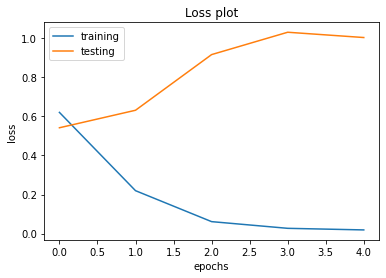

In [37]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Loss plot")
plt.legend(["training","testing"])


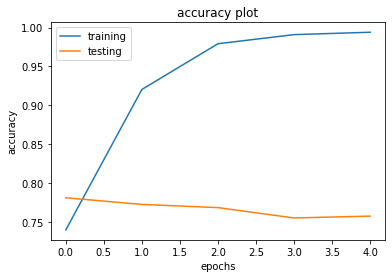

In [38]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("accuracy plot")
plt.legend(["training","testing"])

## Saving the h5 file

In [39]:
model.save("ANN_model.h5")

## Saving the pickle file

In [46]:
import pickleshare

In [47]:
with open("model pickle","wb") as handle:
    pickle.dump(model,handle,protocol=pickle.HIGHEST_PROTOCOL)

INFO:tensorflow:Assets written to: ram://02274c45-6dfa-4e90-8d57-ca59489ee1c0/assets


NotFoundError: 

In [ ]:
with open("model pickle","wb") as handle:
    pickle.load_handle